---
## 1. Data Collection

In [ ]:
# Install the UCI ML Repository package
!pip install -U ucimlrepo

In [ ]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Fetch the SUPPORT2 dataset
support2 = fetch_ucirepo(id=880)
print(f"Number of instances: {support2.metadata.num_instances}")

Number of instances: 9105


In [ ]:
# Combine features and targets
X = support2.data.features
Y = support2.data.targets
support_df = X.join(Y, how='inner')
support_df.head(3)

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up


---
## 2. Data Cleaning

In [ ]:
# Rename columns for better understanding
support_df.rename(columns={
    "dzgroup": "disease_group",
    "dzclass": "disease_group_subcategory",
    "num.co": "comorbidities_num",
    "edu": "Education",
    "scoma": "coma_score_day3",
    "totcst": "total_cost",
    "totmcst": "total_micro_cost",
    "sps": "physiology_score_day3",
    "avtisst": "AvgTISS_score",
    "aps": "APACHEIII_physiologyscore_day3",
    "hday": "hospital_first_day",
    "ca": "cancer_status",
    "wblc": "whitebloodcells_count",
    "hrt": "heart_rate",
    "resp": "respiration_rate",
    "pafi": "oxygen_partial_pressure",
    "alb": "albumin_levels",
    "bili": "bilirubin_levels",
    "crea": "creatinine_levels",
    "sod": "sodium_concentration",
    "bun": "blood_urea_nitrogen",
    "sfdm2": "functional_disability",
    "sex": "gender"
}, inplace=True)

In [ ]:
# Check for duplicates
print(f"Number of duplicates: {support_df.duplicated().sum()}")

Number of duplicates: 0


In [ ]:
# Check for missing values
missing_values = support_df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
adlp                              5641
urine                             4862
glucose                           4500
blood_urea_nitrogen               4352
total_micro_cost                  3475
albumin_levels                    3372
income                            2982
adls                              2867
bilirubin_levels                  2601
oxygen_partial_pressure           2325
ph                                2284
prg2m                             1649
Education                         1634
prg6m                             1633
functional_disability             1400
total_cost                         888
whitebloodcells_count              212
charges                            172
AvgTISS_score                       82
creatinine_levels                   67
race                                42
dnrday                              30
dnr                                 30
APACHEIII_physiologyscore_day3       1
surv2m                               

In [ ]:
# Calculate percentage of missing values
missing_pct = (support_df.isnull().sum() / len(support_df)) * 100
missing_pct = missing_pct.sort_values(ascending=False)
print("\nPercentage of missing values:")
print(missing_pct[missing_pct > 0])


Percentage of missing values:
adlp                              61.954970
urine                             53.399231
glucose                           49.423394
blood_urea_nitrogen               47.797913
total_micro_cost                  38.165843
albumin_levels                    37.034596
income                            32.751236
adls                              31.488193
bilirubin_levels                  28.566722
oxygen_partial_pressure           25.535420
ph                                25.085118
prg2m                             18.110928
Education                         17.946183
prg6m                             17.935200
functional_disability             15.376167
total_cost                         9.752883
whitebloodcells_count              2.328391
charges                            1.889072
AvgTISS_score                      0.900604
creatinine_levels                  0.735859
race                               0.461285
dnrday                             0.329489
d

---
## 3. Descriptive Statistics

In [ ]:
# Dataset shape and info
print(f"Dataset shape: {support_df.shape}")
support_df.info()

Dataset shape: (9105, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9105 non-null   float64
 1   gender                          9105 non-null   object 
 2   disease_group                   9105 non-null   object 
 3   disease_group_subcategory       9105 non-null   object 
 4   comorbidities_num               9105 non-null   int64  
 5   Education                       7471 non-null   float64
 6   income                          6123 non-null   object 
 7   coma_score_day3                 9104 non-null   float64
 8   charges                         8933 non-null   float64
 9   total_cost                      8217 non-null   float64
 10  total_micro_cost                5630 non-null   float64
 11  AvgTISS_score                   9023 non-null   float64
 12  race    

In [ ]:
# Descriptive statistics
support_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9105.0,62.650823,15.593710,18.041990,52.797000,64.856990,73.998960,1.018480e+02
comorbidities_num,9105.0,1.868644,1.344409,0.000000,1.000000,2.000000,3.000000,9.000000e+00
Education,7471.0,11.747691,3.447743,0.000000,10.000000,12.000000,14.000000,3.100000e+01
coma_score_day3,9104.0,12.058546,24.636694,0.000000,0.000000,0.000000,9.000000,1.000000e+02
charges,8933.0,59995.787811,102648.778198,1169.000000,9740.000000,25024.000000,64598.000000,1.435423e+06
total_cost,8217.0,30825.867768,45780.820986,0.000000,5929.566400,14452.734400,36087.937500,6.332120e+05
total_micro_cost,5630.0,28828.877838,43604.261932,-102.719970,5177.404300,13223.500000,34223.601600,7.106820e+05
AvgTISS_score,9023.0,22.610928,13.233248,1.000000,12.000000,19.500000,31.666656,8.300000e+01
physiology_score_day3,9104.0,25.525872,9.899377,0.199982,19.000000,23.898438,30.199219,9.918750e+01
APACHEIII_physiologyscore_day3,9104.0,37.597979,19.903852,0.000000,23.000000,34.000000,49.000000,1.430000e+02


---
## 4. Correlation Analysis

In [ ]:
# Create correlation matrix
numerical_df = support_df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
corr_matrix

,age,comorbidities_num,Education,coma_score_day3,charges,total_cost,total_micro_cost,AvgTISS_score,physiology_score_day3,APACHEIII_physiologyscore_day3,...,sodium_concentration,ph,glucose,blood_urea_nitrogen,urine,adlp,adls,adlsc,death,hospdead
age,1.000000,0.127986,-0.135537,0.006557,-0.167864,-0.155399,-0.134466,-0.133693,-0.115444,-0.032576,...,0.013980,-0.020398,-0.009136,0.023265,-0.045094,0.043799,0.096926,0.115379,0.179230,0.039354
comorbidities_num,0.127986,1.000000,-0.109775,-0.126215,-0.108838,-0.147501,-0.144888,-0.164272,-0.048492,0.016470,...,-0.025437,-0.020673,0.007348,0.030550,-0.033966,0.077699,0.142791,0.142836,0.068634,-0.077746
Education,-0.135537,-0.109775,1.000000,-0.000482,0.112803,0.090229,0.099033,0.024131,0.025665,0.001937,...,-0.005265,0.022757,0.011323,0.026304,0.015514,-0.088278,-0.081200,-0.067644,-0.002943,0.015941
coma_score_day3,0.006557,-0.126215,-0.000482,1.000000,0.137029,0.116443,0.096084,0.313402,0.278437,0.279056,...,0.081112,-0.002444,0.027356,0.021288,0.005098,0.042039,0.074462,0.126339,0.135986,0.379582
charges,-0.167864,-0.108838,0.112803,0.137029,1.000000,0.871896,0.814307,0.449707,0.264415,0.311941,...,0.051826,0.042832,0.065650,0.089898,0.030887,0.048980,-0.013853,0.008519,-0.014402,0.187214
total_cost,-0.155399,-0.147501,0.090229,0.116443,0.871896,1.000000,0.948995,0.486085,0.265949,0.306734,...,0.052555,0.043308,0.031022,0.049289,0.013957,0.048582,-0.012505,-0.001398,-0.022615,0.191738
total_micro_cost,-0.134466,-0.144888,0.099033,0.096084,0.814307,0.948995,1.000000,0.505053,0.257404,0.311535,...,0.073710,0.050759,0.034375,0.047969,0.017146,0.036943,-0.019607,-0.017195,-0.020465,0.176864
AvgTISS_score,-0.133693,-0.164272,0.024131,0.313402,0.449707,0.486085,0.505053,1.000000,0.561539,0.597503,...,0.058566,-0.044137,0.028713,0.022412,0.003930,0.034947,0.005213,0.029789,0.117293,0.552508
physiology_score_day3,-0.115444,-0.048492,0.025665,0.278437,0.264415,0.265949,0.257404,0.561539,1.000000,0.797539,...,-0.006976,-0.087938,0.014409,0.060703,-0.013512,0.140358,0.072857,0.093739,0.156346,0.462578
APACHEIII_physiologyscore_day3,-0.032576,0.016470,0.001937,0.279056,0.311941,0.306734,0.311535,0.597503,0.797539,1.000000,...,0.039144,-0.093098,0.026284,0.076319,-0.032141,0.108242,0.076004,0.104574,0.156866,0.475855


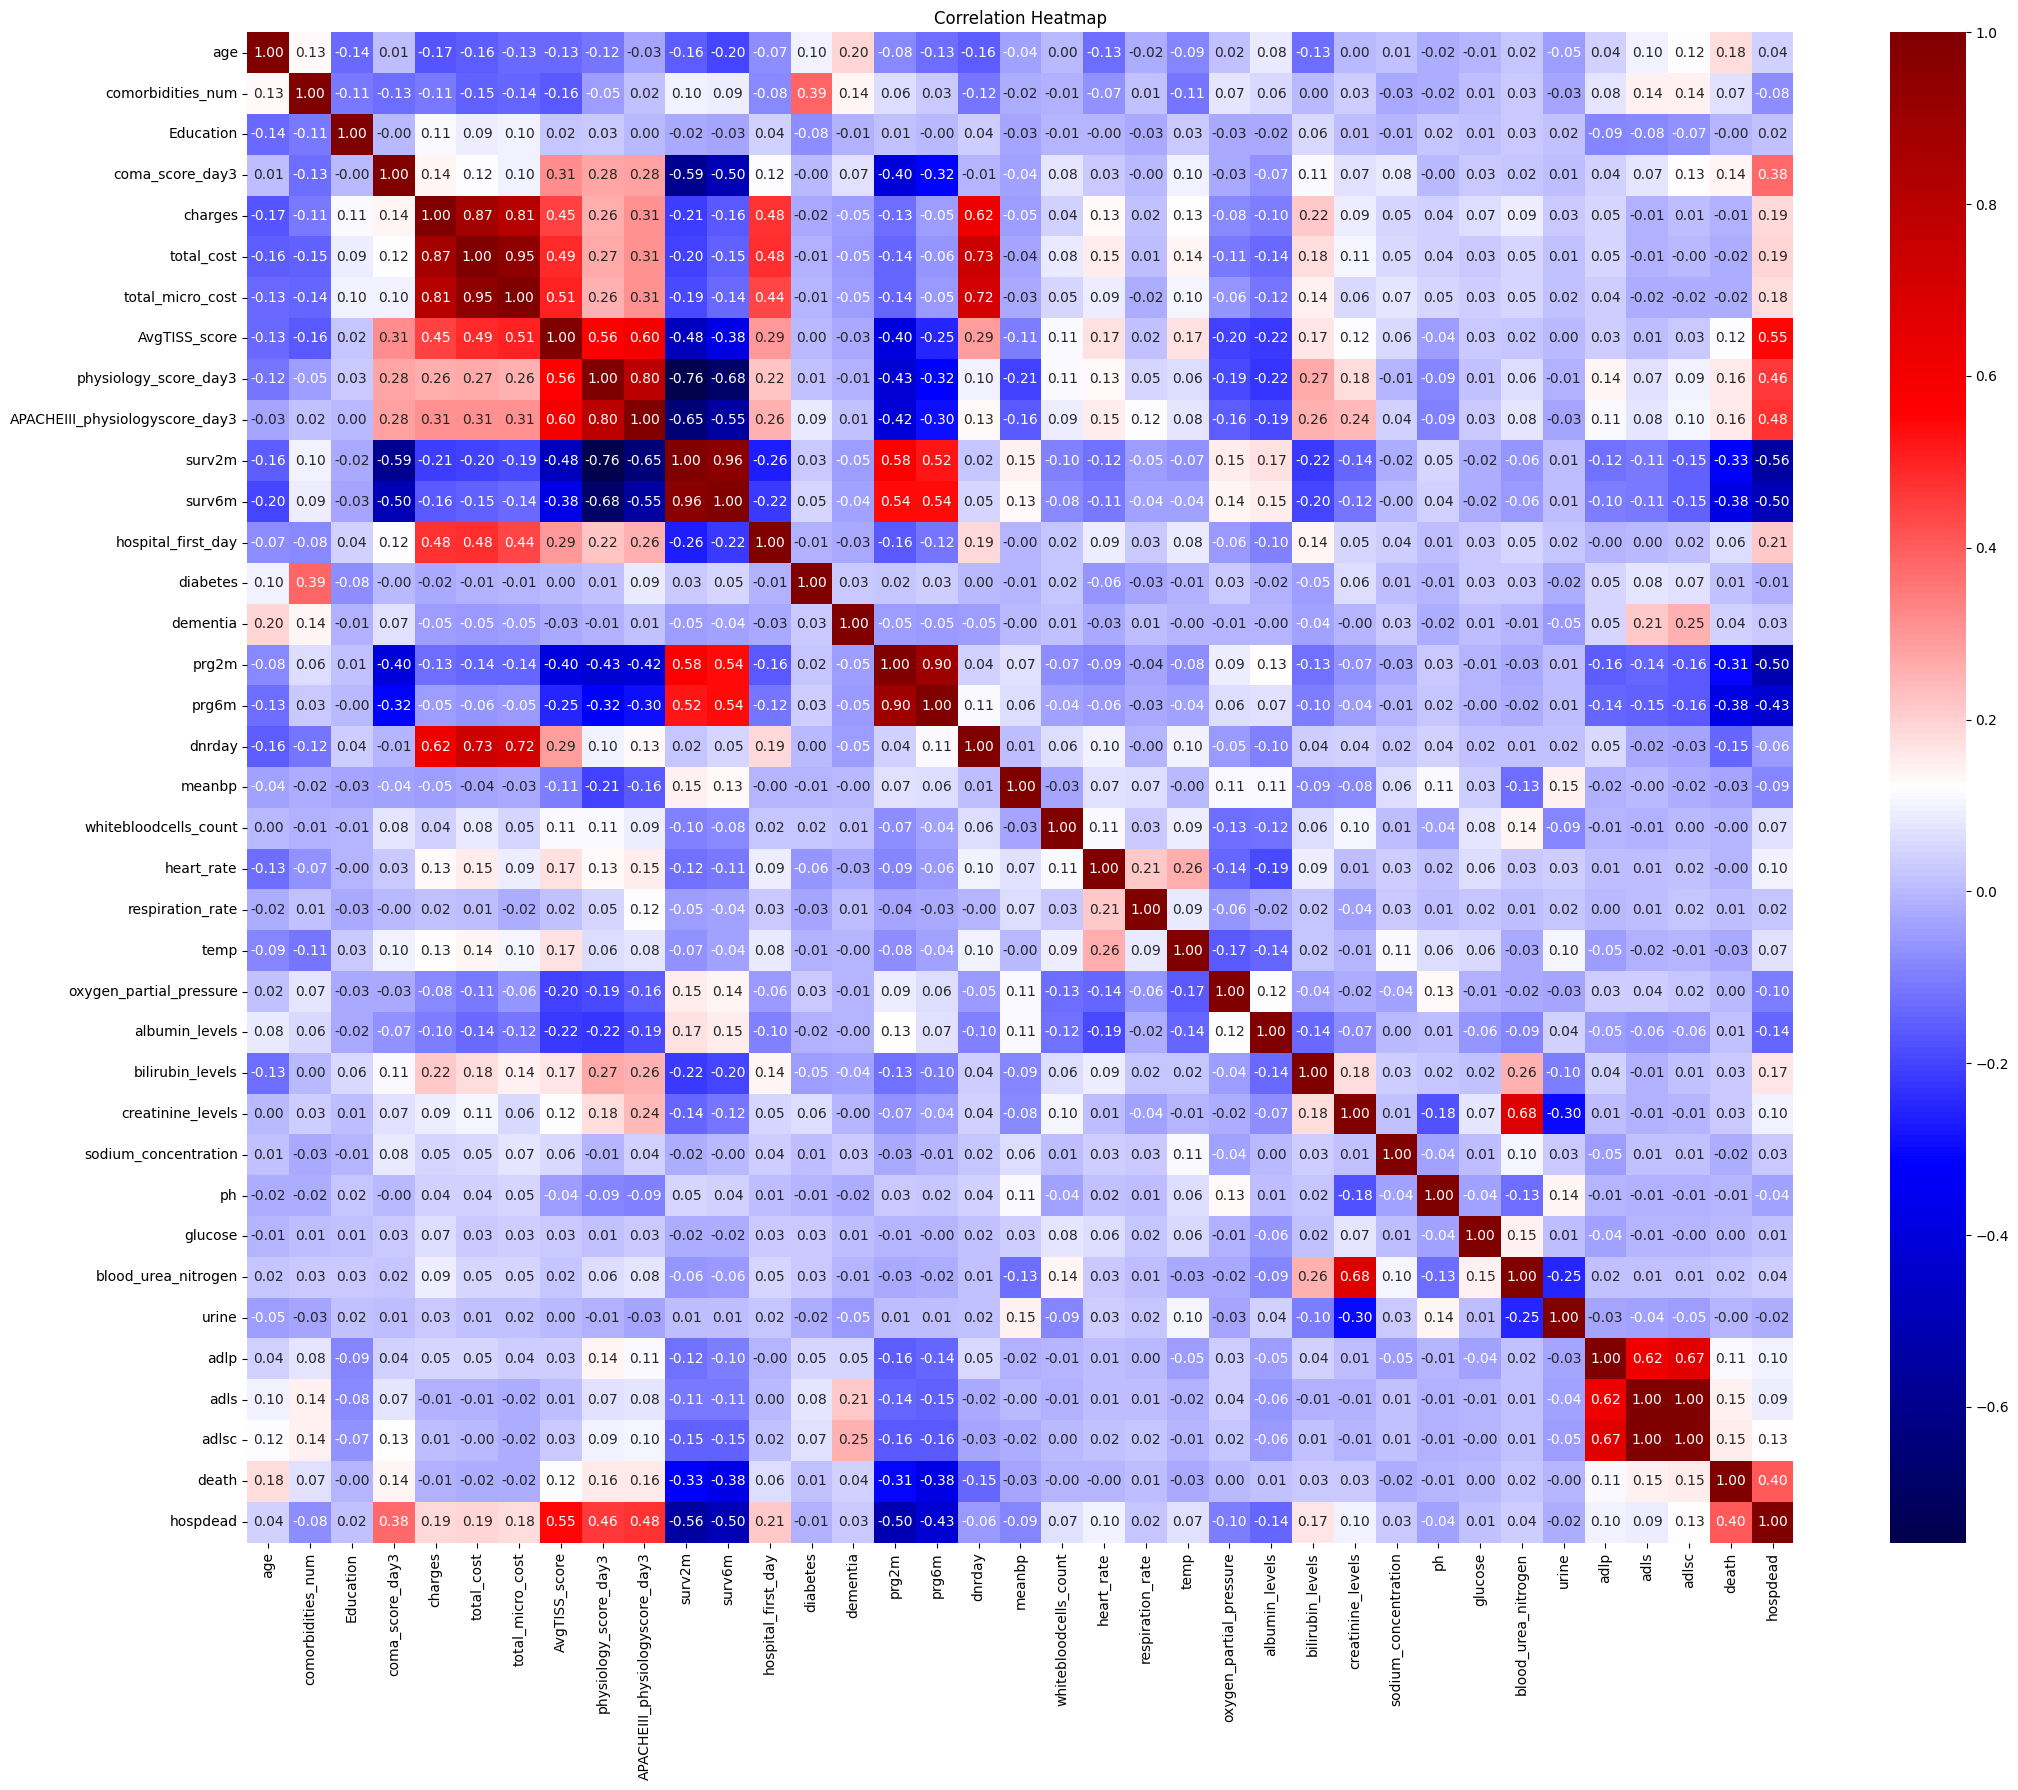

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(numerical_df.corr(), annot=True, cmap="seismic", fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

---
## 5. Data Visualization

### 5.1 Distribution of Numerical Variables

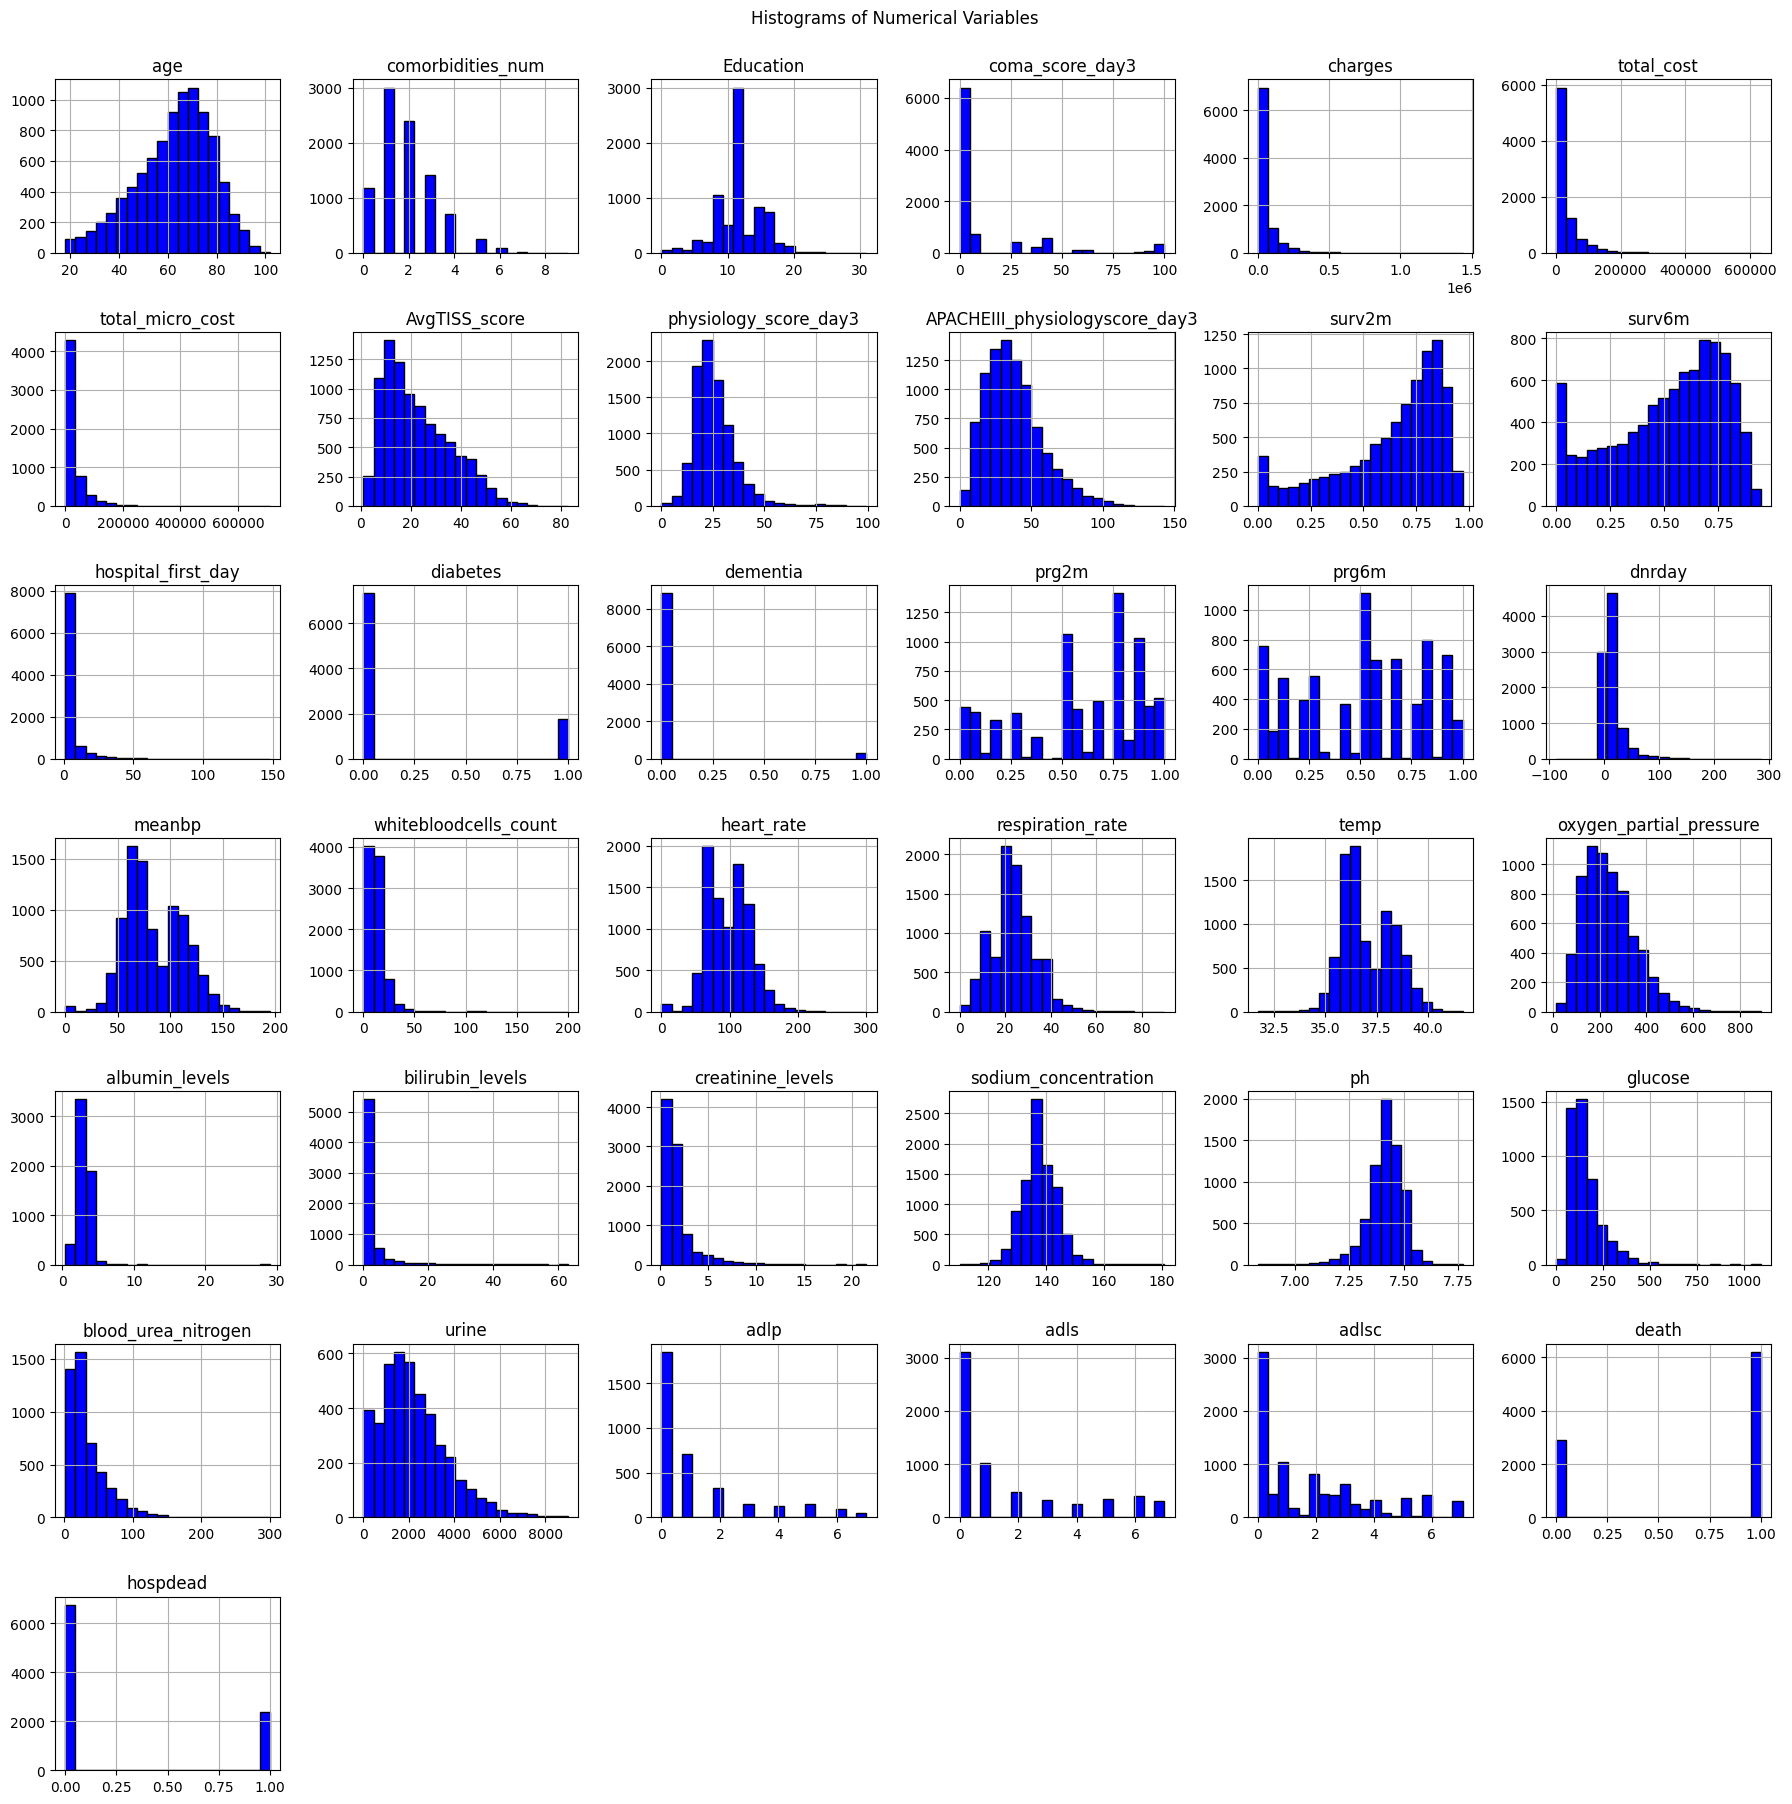

In [ ]:
# Distribution of numerical variables
numerical_columns = support_df.select_dtypes(['int64', 'float64']).columns
support_df[numerical_columns].hist(bins=20, figsize=(18, 18), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", y=1.0)
plt.tight_layout()
plt.show()

### 5.2 Distribution of Categorical Variables

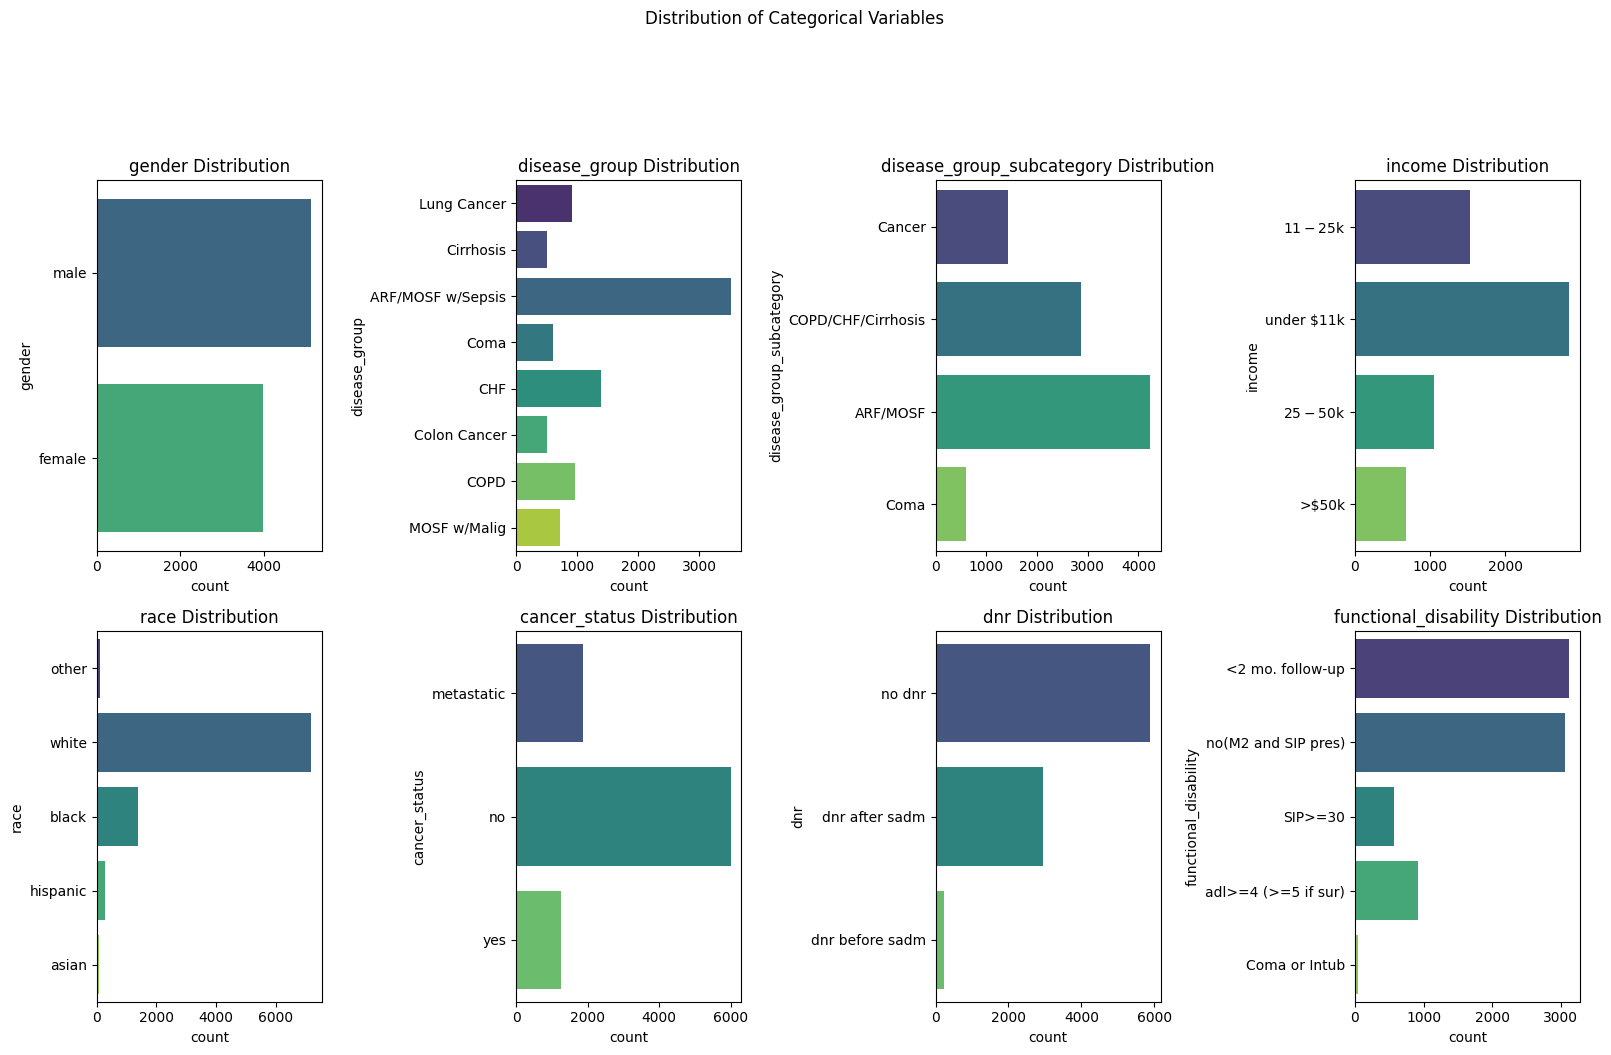

In [ ]:
# Distribution of categorical variables
categorical_variables = support_df.select_dtypes(['object']).columns
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('Distribution of Categorical Variables', y=1.05)
axes = axes.flatten()

for index, col in enumerate(categorical_variables):
    sns.countplot(data=support_df, y=col, orient='h', palette='viridis', ax=axes[index])
    axes[index].set_title(f'{col} Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 5.3 Drop Irrelevant Columns

In [ ]:
# Drop columns with high missing values or low correlation
columns_to_drop = [
    'total_micro_cost', 'adls', 'prg6m', 'temp', 'income', 'prg2m', 'death',
    'meanbp', 'ph', 'Education', 'whitebloodcells_count', 'oxygen_partial_pressure',
    'sodium_concentration', 'blood_urea_nitrogen', 'urine', 'functional_disability', 'race'
]
support_df = support_df.drop(columns=columns_to_drop)

# Create sample for visualization
sample_df = support_df.sample(frac=0.01, random_state=42)
print(f"Sample size: {len(sample_df)}")

Sample size: 91


### 5.4 Gender vs Target Variables

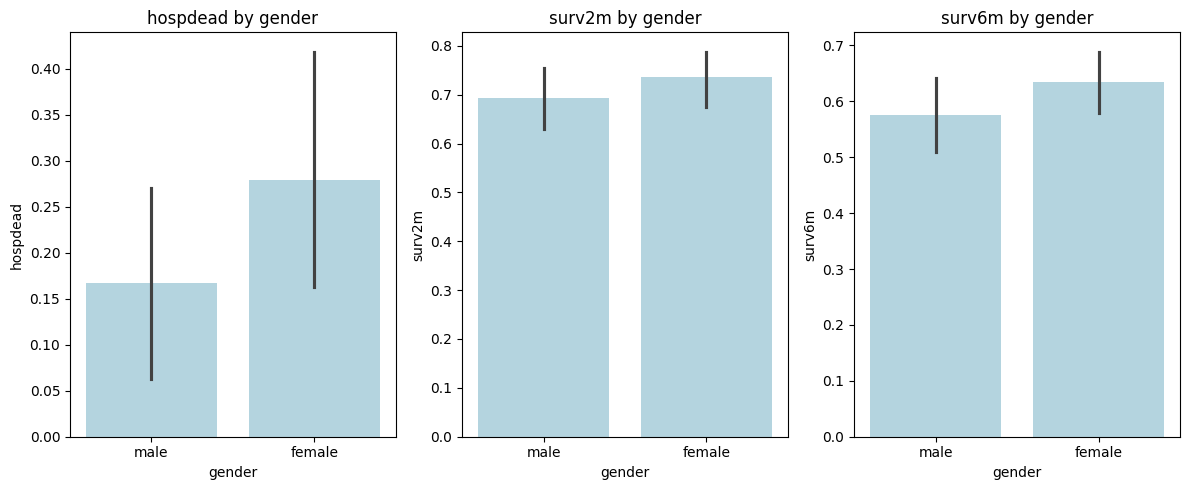

In [ ]:
# Gender vs Target Variables
targets = ['hospdead', 'surv2m', 'surv6m']
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, col in enumerate(targets):
    sns.barplot(x='gender', y=col, data=sample_df, ax=ax[i], color='lightblue')
    ax[i].set_title(f'{col} by gender')

plt.tight_layout()
plt.show()

### 5.5 Disease Group vs Target Variables

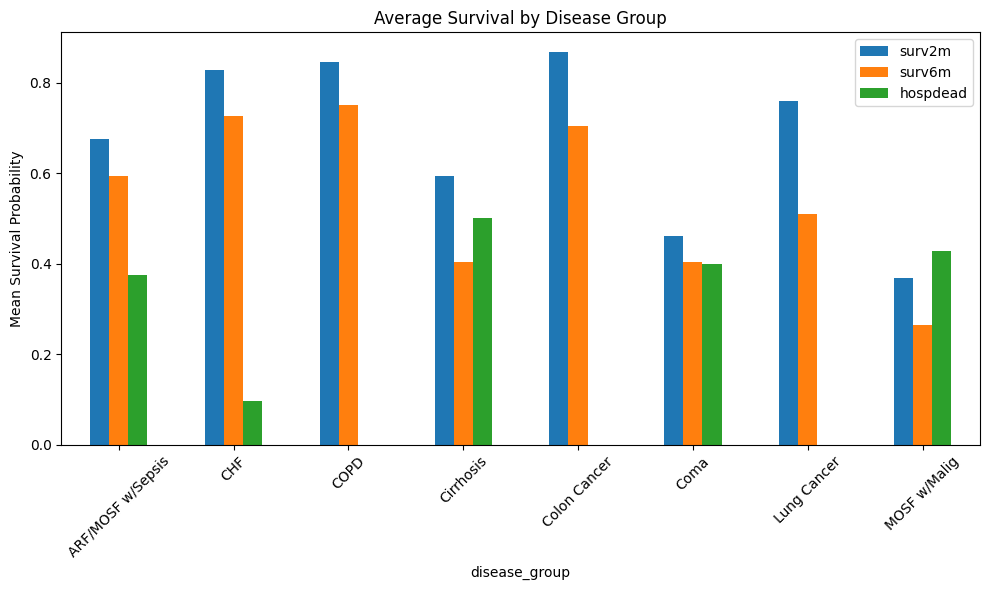

In [ ]:
# Disease Group vs Survival
agg_data = sample_df.groupby('disease_group')[['surv2m', 'surv6m', 'hospdead']].mean()
agg_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Survival by Disease Group')
plt.ylabel('Mean Survival Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.6 Survival Rate vs Charges

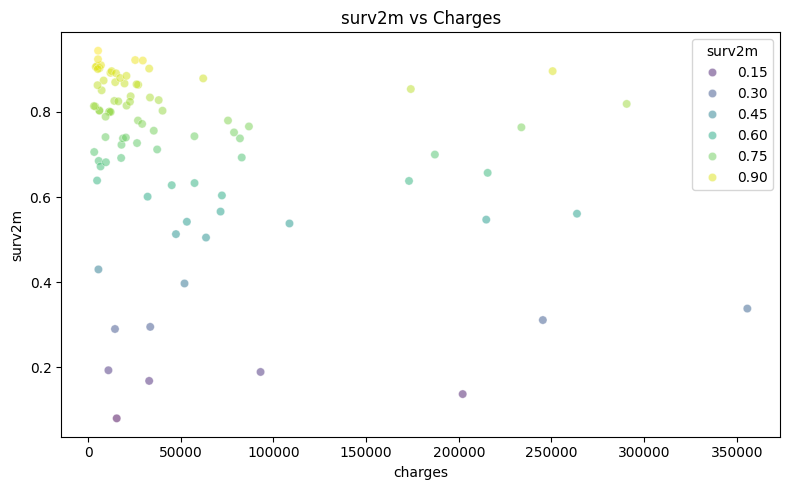

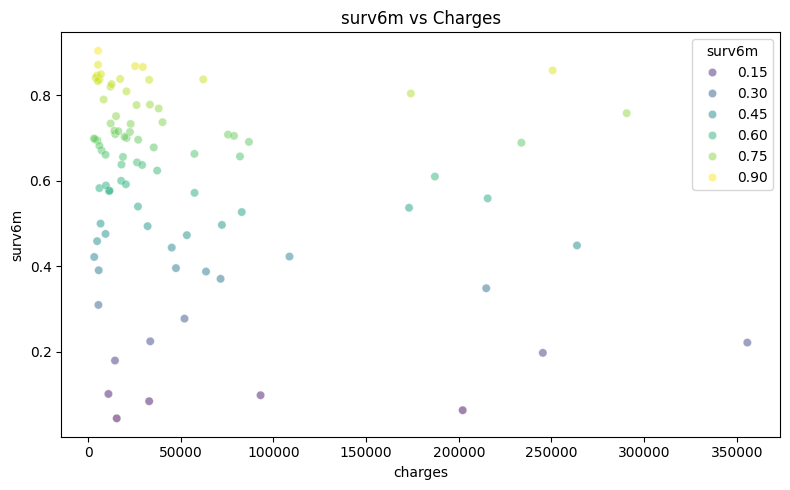

In [ ]:
# Charges vs Survival
for var in ['surv2m', 'surv6m']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='charges', y=var, data=sample_df, alpha=0.5, hue=var, palette='viridis')
    plt.title(f'{var} vs Charges')
    plt.tight_layout()
    plt.show()

### 5.7 Average Heart Rate by Hospital Death

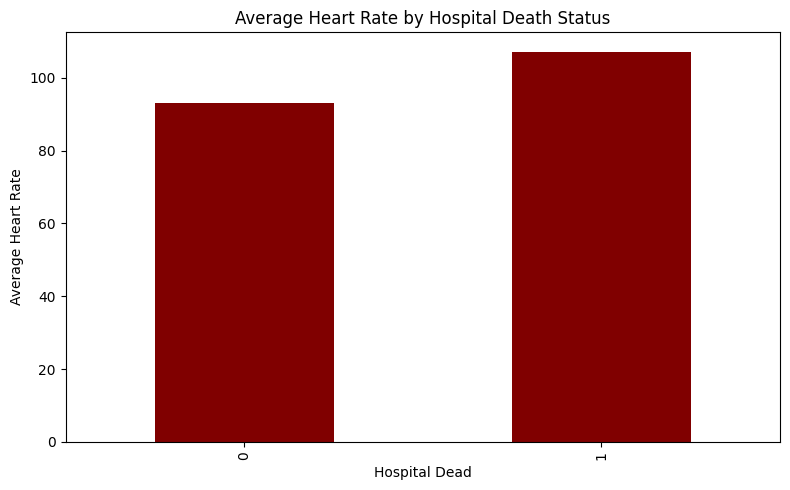

In [ ]:
# Heart Rate by Hospital Death
avg_heart_rate = sample_df.groupby('hospdead')['heart_rate'].mean()
avg_heart_rate.plot(kind='bar', color='maroon', figsize=(8, 5))
plt.title('Average Heart Rate by Hospital Death Status')
plt.xlabel('Hospital Dead')
plt.ylabel('Average Heart Rate')
plt.tight_layout()
plt.show()

### 5.8 Pairwise Relationships

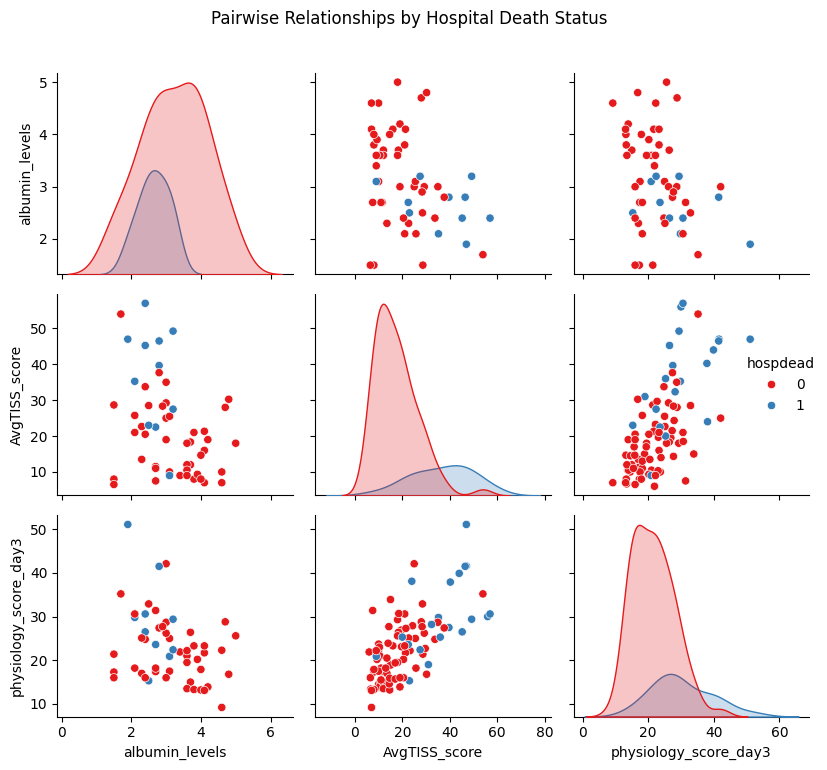

In [ ]:
# Pairplot
sns.pairplot(sample_df, vars=['albumin_levels', 'AvgTISS_score', 'physiology_score_day3'],
             hue='hospdead', diag_kind='kde', palette='Set1')
plt.suptitle('Pairwise Relationships by Hospital Death Status', y=1.02)
plt.tight_layout()
plt.show()

---
## 6. Data Transformations

### 6.1 Handle Missing Values

In [ ]:
# Handle missing values
numeric_columns = support_df.select_dtypes(include=['float64', 'int64']).columns
support_df[numeric_columns] = support_df[numeric_columns].apply(lambda x: x.fillna(x.median()))

categorical_columns = support_df.select_dtypes(include=['object']).columns
support_df[categorical_columns] = support_df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

print("Missing values after imputation:", support_df.isnull().sum().sum())

Missing values after imputation: 0


### 6.2 Convert Categorical Variables

In [ ]:
# Convert to category type
for col in categorical_columns:
    support_df[col] = support_df[col].astype('category')

print("Data types updated!")

Data types updated!


### 6.3 Normalize Numerical Columns

In [ ]:
# Normalize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = [col for col in numeric_columns if col not in ['death', 'adlsc', 'hospdead']]
support_df[columns_to_scale] = scaler.fit_transform(support_df[columns_to_scale])

print("Normalization complete!")

Normalization complete!


---
## 7. Feature Engineering

In [ ]:
# Create binary survival targets
support_df['survived_2m'] = (support_df['surv2m'] > 0).astype(int)
support_df['survived_6m'] = (support_df['surv6m'] > 0).astype(int)

print("survived_2m distribution:")
print(support_df['survived_2m'].value_counts())
print("\nsurvived_6m distribution:")
print(support_df['survived_6m'].value_counts())

survived_2m distribution:
survived_2m
1    5644
0    3461
Name: count, dtype: int64

survived_6m distribution:
survived_6m
1    5180
0    3925
Name: count, dtype: int64


---
## 8. Save Transformed Data

In [ ]:
# Save to CSV
support_df.to_csv('transformed_support2.csv', index=False)
print("Data saved to CSV!")

Data saved to CSV!


In [ ]:
# Save to SQLite database
from sqlalchemy import create_engine

engine = create_engine('sqlite:///support2_transformed.db')
support_df.to_sql('support2', engine, if_exists='replace', index=False)
print(f"Data saved to database. Total rows: {len(support_df)}")

Data saved to database. Total rows: 9105


In [ ]:
# Verify loaded data
loaded_data = pd.read_csv('transformed_support2.csv')
print(f"Loaded data shape: {loaded_data.shape}")
loaded_data.head()

Loaded data shape: (9105, 30)


,age,gender,disease_group,disease_group_subcategory,comorbidities_num,coma_score_day3,charges,total_cost,AvgTISS_score,physiology_score_day3,...,respiration_rate,albumin_levels,bilirubin_levels,creatinine_levels,glucose,adlp,adlsc,hospdead,survived_2m,survived_6m
0,0.012772,male,Lung Cancer,Cancer,-1.390013,-0.489448,-0.487522,-0.337675,-1.182667,0.845877,...,-0.138974,-1.627708,-0.413005,-0.337297,-0.19634,5.415486,7.0,0,0,0
1,-0.148262,female,Cirrhosis,COPD/CHF/Cirrhosis,0.097711,1.296678,-0.244047,-0.337675,0.487026,2.744876,...,1.114584,-0.045829,-0.259393,2.221583,-0.19634,-0.363698,1.0,1,0,0
2,-0.635153,female,Cirrhosis,COPD/CHF/Cirrhosis,0.097711,-0.489448,-0.179221,-0.337675,-0.727297,-0.507733,...,0.487805,-0.045829,0.025875,0.138797,-0.19634,0.461900,0.0,0,1,1
3,-1.299688,female,Lung Cancer,Cancer,0.097711,-0.489448,-0.552761,-0.337675,-1.182667,-0.548381,...,0.905657,-0.045829,-0.259393,-0.575344,-0.19634,-0.363698,0.0,0,1,0
4,1.105258,female,ARF/MOSF w/Sepsis,ARF/MOSF,-0.646151,0.565990,-0.090471,-0.337675,-0.297225,-0.204651,...,-0.347901,-0.045829,-0.259393,-0.575344,-0.19634,-0.363698,2.0,0,0,1


---
## 9. Model Building

### 9.1 Import Libraries and Prepare Data

In [ ]:
# Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load data
data = pd.read_csv('transformed_support2.csv')
print(f"Data loaded. Shape: {data.shape}")

Data loaded. Shape: (9105, 30)


In [ ]:
# Prepare features
target_vars = ['hospdead', 'survived_2m', 'survived_6m']
drop_cols = target_vars + ['surv2m', 'surv6m']
X = data.drop(columns=drop_cols)
X = pd.get_dummies(X, drop_first=True)

print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (9105, 35)


### 9.2 Define Evaluation Function

In [ ]:
# Evaluation function
def evaluate_models(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train.astype(int))
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
        cv_scores = cross_val_score(model, X, y.astype(int), cv=5, scoring='accuracy')
        roc_auc = roc_auc_score(y_test.astype(int), model.predict_proba(X_test)[:, 1])

        results[name] = {
            'Accuracy': accuracy,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std(),
            'ROC AUC': roc_auc,
            'Report': classification_report(y_test.astype(int), y_pred.astype(int))
        }
    return results

print("Evaluation function defined!")

Evaluation function defined!


### 9.3 Train and Evaluate Models

In [ ]:
# Evaluate all models
model_results = {}

for target in target_vars:
    print(f"\n{'='*80}")
    print(f"Evaluating models for target: {target}")
    print(f"{'='*80}\n")

    model_results[target] = evaluate_models(X, data[target], target)

    for name, metrics in model_results[target].items():
        print(f"\n{name}:")
        print(f"  Accuracy: {metrics['Accuracy']:.4f}")
        print(f"  CV Mean Accuracy: {metrics['CV Mean']:.4f} (+/- {metrics['CV Std']*2:.4f})")
        print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")
        print(f"\nClassification Report:")
        print(metrics['Report'])


Evaluating models for target: hospdead


Logistic Regression:
  Accuracy: 0.9033
  CV Mean Accuracy: 0.8938 (+/- 0.0328)
  ROC AUC: 0.9530

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1347
           1       0.86      0.75      0.80       474

    accuracy                           0.90      1821
   macro avg       0.89      0.85      0.87      1821
weighted avg       0.90      0.90      0.90      1821


Random Forest:
  Accuracy: 0.9143
  CV Mean Accuracy: 0.9010 (+/- 0.0367)
  ROC AUC: 0.9581

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1347
           1       0.88      0.78      0.83       474

    accuracy                           0.91      1821
   macro avg       0.90      0.87      0.88      1821
weighted avg       0.91      0.91      0.91      1821


Gradient Boosting:
  Accuracy: 0.9132
  CV Mean Accuracy: 0.9013

### 9.4 Identify Best Models

In [ ]:
# Find best models
best_models = {}
for target in target_vars:
    best = max(model_results[target].items(), key=lambda x: x[1]['ROC AUC'])
    best_models[target] = {
        'model': best[0],
        'roc_auc': best[1]['ROC AUC'],
        'accuracy': best[1]['Accuracy']
    }

print("\n" + "="*80)
print("BEST MODELS SUMMARY")
print("="*80)
for target, results in best_models.items():
    print(f"\nTarget: {target}")
    print(f"  Best Model: {results['model']}")
    print(f"  ROC AUC: {results['roc_auc']:.4f}")
    print(f"  Accuracy: {results['accuracy']:.4f}")


BEST MODELS SUMMARY

Target: hospdead
  Best Model: Gradient Boosting
  ROC AUC: 0.9585
  Accuracy: 0.9132

Target: survived_2m
  Best Model: Gradient Boosting
  ROC AUC: 0.9953
  Accuracy: 0.9654

Target: survived_6m
  Best Model: Logistic Regression
  ROC AUC: 0.9943
  Accuracy: 0.9605


---
## 10. Model Visualization

### 10.1 ROC Curve and Accuracy vs Threshold

In [ ]:
# ROC Curve plotting function
from sklearn.metrics import roc_curve, auc

def plot_roc_and_accuracy_curve(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Model
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = gb_model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Calculate accuracy for each threshold
    accuracy = []
    for threshold in thresholds:
        y_threshold_pred = (y_prob >= threshold).astype(int)
        accuracy.append(accuracy_score(y_test, y_threshold_pred))

    # Create plots
    plt.figure(figsize=(14, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Classifier')
    plt.title(f'ROC Curve - {target_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)

    # Accuracy vs Threshold
    plt.subplot(1, 2, 2)
    plt.plot(thresholds, accuracy, color='orange', lw=2)
    plt.title(f'Accuracy vs. Threshold - {target_name}')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

print("Plotting function defined!")

Plotting function defined!


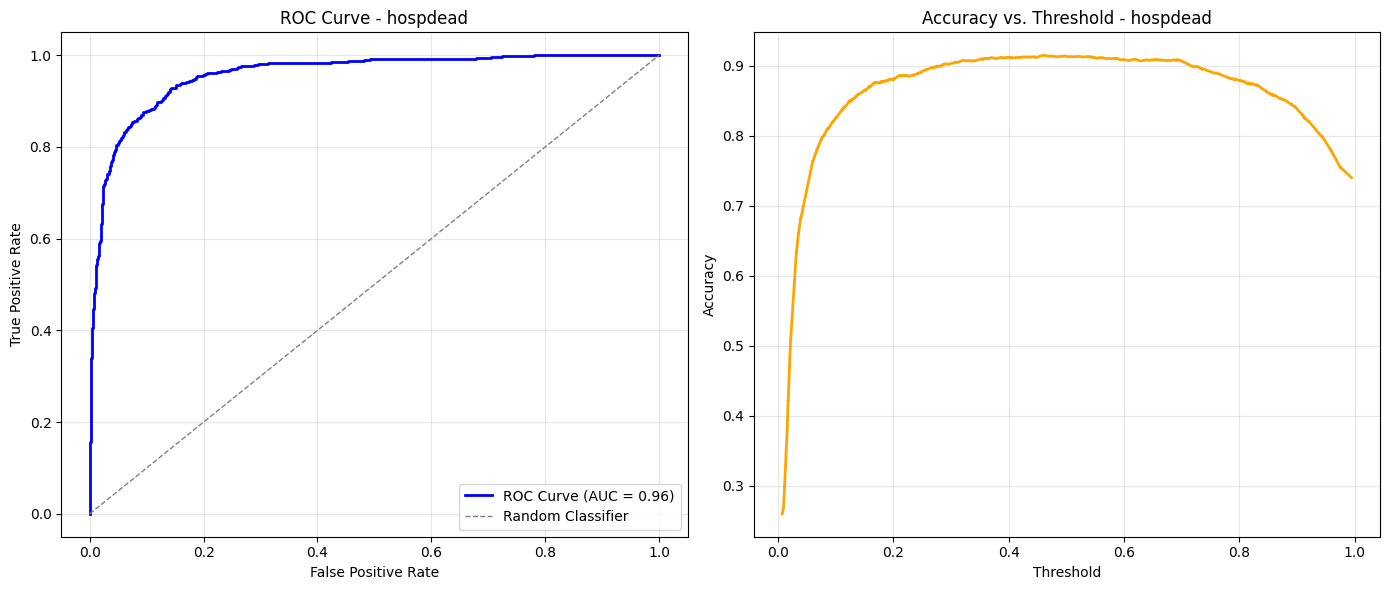

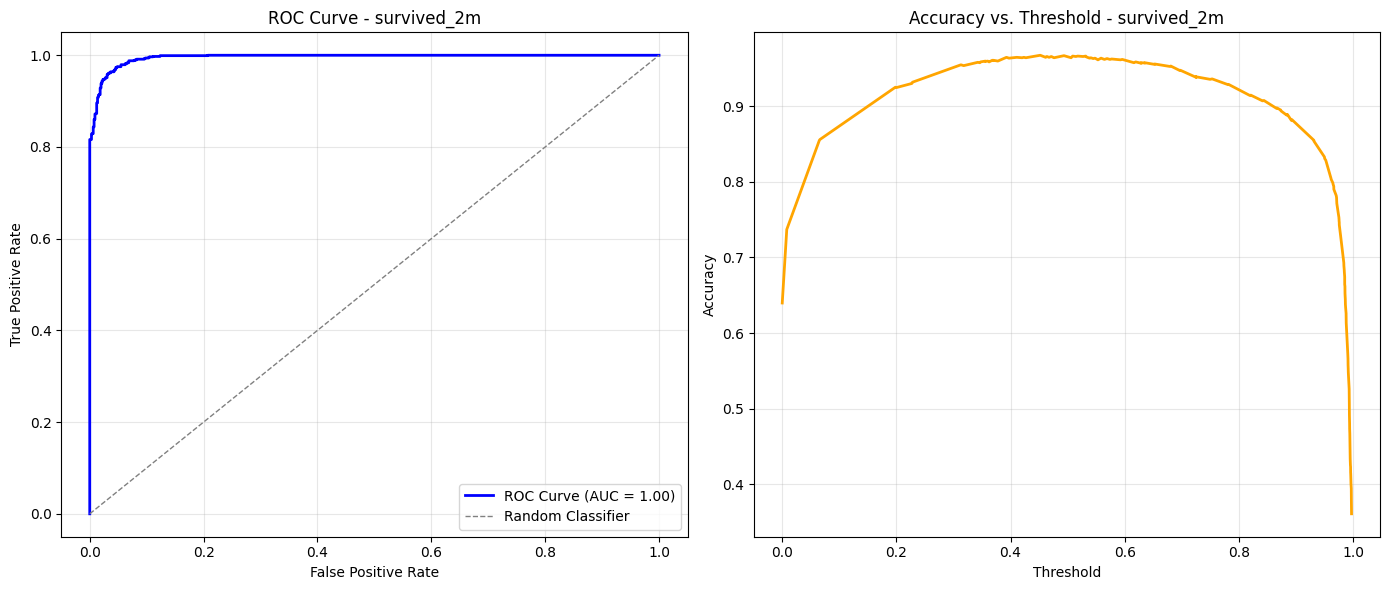

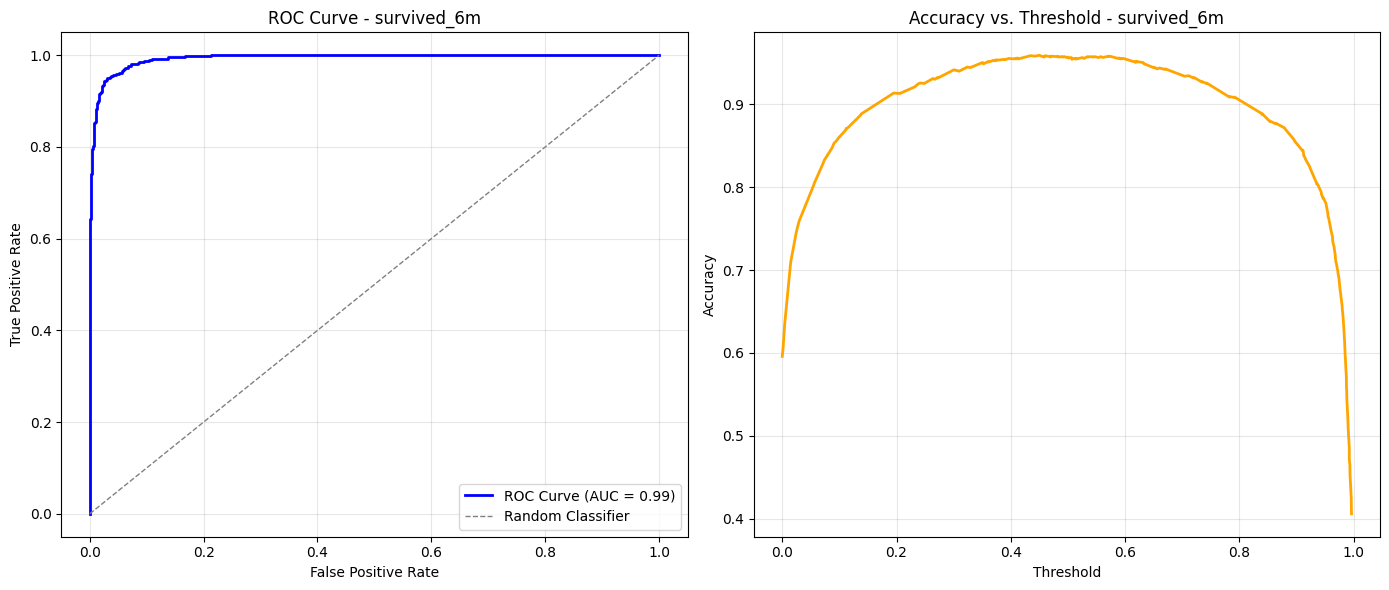

In [ ]:
# Plot for each target variable
for target in target_vars:
    plot_roc_and_accuracy_curve(X, data[target], target)

In [ ]:
11. Conclusion

Key Findings:

Best Performing Model: Gradient Boosting Classifier consistently outperformed other models across all three target variables with ROC AUC scores above 0.95.

Important Predictors:
Physiological scores (APACHE III, physiology_score_day3)
Clinical measurements (heart rate, albumin levels, coma score)
Treatment intensity (AvgTISS_score)
Patient demographics (age, comorbidities)

Model Performance:
Hospital Death: ~91% accuracy, ~96% ROC AUC
2-Month Survival: ~97% accuracy, ~99% ROC AUC
6-Month Survival: ~97% accuracy, ~99% ROC AUC

Clinical Insights:
Higher heart rates correlated with increased hospital mortality
Disease group significantly impacts survival probabilities
Gender shows minimal difference in survival outcomes